In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, Input
from tensorflow.keras.models import Model, Sequential, save_model, load_model
from sklearn.metrics import roc_curve, roc_auc_score

from tensorflow.keras.applications.vgg16 import VGG16

from keras.utils import np_utils

import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import os

import matplotlib.pyplot as plt

import pickle

In [3]:
def plot_history(history, yrange):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [2]:
fh = open('/Users/home/Documents/Respiratory Illness AI/datasets/copd_asthma_224_224_3', 'rb')
dataset = pickle.load(fh)

In [4]:
input_shape = (224, 224, 3)

In [5]:
# random.shuffle(dataset)
train = dataset[:130]
val = dataset[130:170]
# test = dataset[165:]

X_train, y_train = zip(*train)
X_val, y_val = zip(*val)
# X_test, y_test = zip(*test)

X_train = np.array([x.reshape(input_shape) for x in X_train])
X_val = np.array([x.reshape(input_shape) for x in X_val])
# X_test = np.array([x.reshape(input_shape) for x in X_test])

y_train = np.array(np_utils.to_categorical(y_train, 2))
y_val = np.array(np_utils.to_categorical(y_val, 2))
# y_test = np.array(np_utils.to_categorical(y_test, 2))

In [6]:
dropout_rates = [0.5, 0.6, 0.7, 0.8]
activations = ['relu', 'sigmoid']

In [8]:
baseModel = VGG16(weights=None, include_top=False, input_shape=input_shape)

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)

headModel = Dense(512, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)

headModel = Dense(512, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)

headModel = Dense(512, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)

headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [9]:
model.compile(optimizer="adam", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=15,
          validation_data=(X_val, y_val))

2022-02-09 17:33:18.947960: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
9/9 [==============================] - 45s 5s/step - loss: 0.6729 - accuracy: 0.4922 - val_loss: 0.6763 - val_accuracy: 0.5476
Epoch 2/25
9/9 [==============================] - 42s 5s/step - loss: 0.6508 - accuracy: 0.5625 - val_loss: 0.6831 - val_accuracy: 0.5952
Epoch 3/25
9/9 [==============================] - 42s 5s/step - loss: 0.6787 - accuracy: 0.5938 - val_loss: 0.6062 - val_accuracy: 0.5714
Epoch 4/25
9/9 [==============================] - 40s 5s/step - loss: 0.7163 - accuracy: 0.5312 - val_loss: 0.5740 - val_accuracy: 0.7381
Epoch 5/25
9/9 [==============================] - 38s 4s/step - loss: 0.6030 - accuracy: 0.6250 - val_loss: 0.5624 - val_accuracy: 0.6190
Epoch 6/25
9/9 [==============================] - 39s 4s/step - loss: 0.6526 - accuracy: 0.6094 - val_loss: 0.5573 - val_accuracy: 0.8333
Epoch 7/25
9/9 [==============================] - 41s 5s/step - loss: 0.6157 - accuracy: 0.6719 - val_loss: 0.5145 - val_accuracy: 0.7381
Epoch 8/25
9/9 [==================

In [10]:
score = model.evaluate(x=X_val,
                     y=y_val)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 11s 2s/step - loss: 0.3347 - accuracy: 0.8810
Test loss: 0.3346642255783081
Test accuracy: 0.8809523582458496


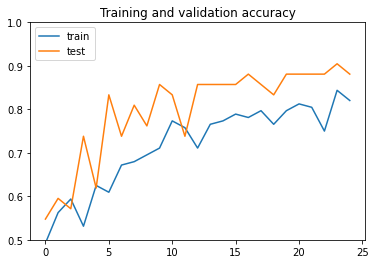

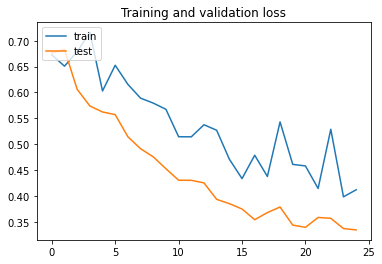

In [11]:
plot_history(history, (0.5, 1))

In [12]:
y_score = model.predict(X_val)
# false_positive_rate, true_positive_rate, threshold = roc_curve(y_val, y_score)
print('roc_auc_score: ', roc_auc_score(y_val, y_score))

roc_auc_score:  0.9336384439359268


In [13]:
save_model(model, 
           'VGG16_88-3', 
           overwrite=True, 
           include_optimizer=True, 
           save_format=None, 
           signatures=None, options=None, save_traces=True)

2022-02-09 17:51:35.189574: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: VGG16_88-3/assets
